In [1]:
%run ../00_AdvancedPythonConcepts/talktools.py

# A brief introduction to SciPy

Scipy is a collection of packages, these typically need to be imported separately:

     cluster                      : Vector Quantization / Kmeans
     fftpack                      : Discrete Fourier Transform algorithms
     integrate                    : Integration routines
     interpolate                  : Interpolation Tools
     io                           : Data input and output
     lib                          : Python wrappers to external libraries
     lib.blas                     : Wrappers to BLAS library
     lib.lapack                   : Wrappers to LAPACK library
     linalg                       : Linear algebra routines
     misc                         : Various utilities that don't have another home.
     ndimage                      : n-dimensional image package
     odr                          : Orthogonal Distance Regression
     optimize                     : Optimization Tools
     signal                       : Signal Processing Tools
     sparse                       : Sparse Matrices
     sparse.linalg                : Sparse Linear Algebra
     sparse.linalg.dsolve         : Linear Solvers
     sparse.linalg.dsolve.umfpack : :Interface to the UMFPACK library:
     sparse.linalg.eigen          : Sparse Eigenvalue Solvers
     sparse.linalg.eigen.arpack   : Eigenvalue solver using iterative methods.
     sparse.linalg.eigen.lobpcg   : Locally Optimal Block Preconditioned
                                      Conjugate Gradient Method (LOBPCG)     
     spatial                      : Spatial data structures and algorithms
     special                      : Airy Functions
     stats                        : Statistical Functions
     stats.mstats                 : Statistical functions for masked arrays
     weave                        : C/C++ integration

## Vectorizing for speed

This is silly:

In [2]:
import numpy as np

def dumb_myfun(a, b):
    return np.array([a[i] if a[i] < b else 2*b for i in range(len(a))])

In [3]:
x = np.arange(1.e6)/1.e6
x

array([0.00000e+00, 1.00000e-06, 2.00000e-06, ..., 9.99997e-01,
       9.99998e-01, 9.99999e-01])

In [4]:
%timeit dumb_myfun(x, 0.5)

300 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We can use `scipy.vectorize`, which is similar to `map` but operates fast on numpy arrays:

In [5]:
import scipy as sp
myfun = lambda a,b: a if a < b else 2*b
vec_myfun = sp.vectorize(myfun)
vec_myfun

In [6]:
%timeit vec_myfun(x, 0.5)

150 ms ± 2.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Let's not forget `numexpr` we saw earlier today:

In [7]:
import numexpr as ne
b = 0.5
%timeit ne.evaluate("where(x < %f, x, %f)" % (b, b*2))

2.02 ms ± 887 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Scipy constants

`scipy.constants` is a convenient compilation of the [2018 CODATA constants](https://physics.nist.gov/cuu/Constants/).

In [8]:
from scipy import constants as cons
print(cons.milli, cons.eV, cons.c)

0.001 1.602176634e-19 299792458.0


In [9]:
cons.physical_constants

{'Wien displacement law constant': (0.0028977685, 'm K', 5.1e-09),
 'atomic unit of 1st hyperpolarizablity': (3.20636151e-53,
  'C^3 m^3 J^-2',
  2.8e-60),
 'atomic unit of 2nd hyperpolarizablity': (6.2353808e-65,
  'C^4 m^4 J^-3',
  1.1e-71),
 'atomic unit of electric dipole moment': (8.47835309e-30, 'C m', 7.3e-37),
 'atomic unit of electric polarizablity': (1.648777274e-41,
  'C^2 m^2 J^-1',
  1.6e-49),
 'atomic unit of electric quadrupole moment': (4.48655124e-40,
  'C m^2',
  3.9e-47),
 'atomic unit of magn. dipole moment': (1.8548019e-23, 'J T^-1', 1.6e-30),
 'atomic unit of magn. flux density': (235051.756758, 'T', 7.1e-05),
 'deuteron magn. moment': (4.33073482e-27, 'J T^-1', 3.8e-34),
 'deuteron magn. moment to Bohr magneton ratio': (0.0004669754567, '', 5e-12),
 'deuteron magn. moment to nuclear magneton ratio': (0.8574382329,
  '',
  9.2e-09),
 'deuteron-electron magn. moment ratio': (-0.0004664345548, '', 5e-12),
 'deuteron-proton magn. moment ratio': (0.3070122084, '', 4.5

In [10]:
len(cons.physical_constants)

442

We can even search it like a little database:

In [11]:
cons.find('Newton')

['Newtonian constant of gravitation',
 'Newtonian constant of gravitation over h-bar c']

In [13]:
G = cons.value('Newtonian constant of gravitation')
G_u = cons.unit('Newtonian constant of gravitation')
G_e = cons.precision('Newtonian constant of gravitation')
print(f"{G=} ± {G_e*G, G_u}")

G=6.6743e-11 ± (1.5e-15, 'm^3 kg^-1 s^-2')


# Interpolation

In [15]:
from scipy.interpolate import interp1d, UnivariateSpline
from scipy import constants as cons

In [17]:
# set up some fake data, listing locations versus time
rng = np.random.RandomState(42)

M = 5.98e24  # mass and radius of Earth
R = 6.38e6
accel = cons.G*M/R**2  # Earth's grav acceleration
times = np.arange(0, 10, 0.5)  # seconds
locations = 0.5*accel*times**2 + 50*np.random.random(len(times))

# now interpolate onto a much finer grid, using both iterp1d and UnivariateSpline
i_times = np.arange(0.5, 9, 0.1)
# list of interpolated values of location at i_times
i_locs = interp1d(times, locations, kind="cubic")
# a function that will return interpolated values
s = UnivariateSpline(times, locations)

In [18]:
%matplotlib inline
import matplotlib.pylab as plt

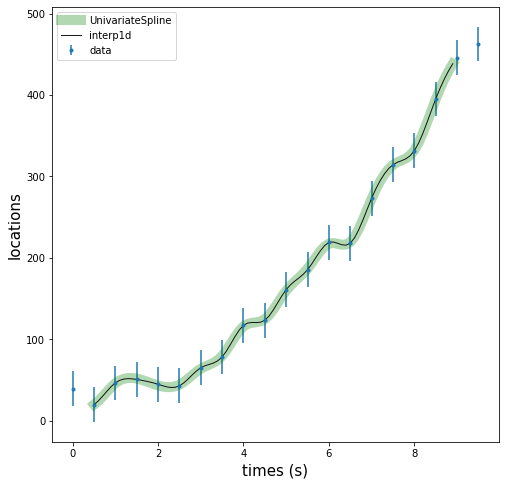

In [19]:
# plot up several different views of this example
plt.figure(figsize=(8, 8))
plt.errorbar(times, locations, yerr=50/2.35,
             linestyle='None', marker=".", label='data')
plt.plot(i_times, s(i_times), c="g", lw=10,
         alpha=0.3, label='UnivariateSpline')
plt.plot(i_times, i_locs(i_times), c="black",
         lw=1, alpha=0.9, label='interp1d')
plt.ylabel('locations', fontsize=15)
plt.xlabel('times (s)', fontsize=15)
plt.legend(loc='best')

## Numerical Integration

In [20]:
from scipy.integrate import quad
val, err =quad( lambda x: np.sin(x) , 0 , np.pi, full_output=False)
print(val, err)

2.0 2.220446049250313e-14


In [ ]:
from scipy.integrate import ode
ode?

## Special functions

In [ ]:
from scipy import special
special?

In [21]:
from scipy.special import betainc
betainc(10, 10, 0.2)

0.0015791205491671057

## Polynomial Fitting

Basic (least squares) polynomial fitting can be performed using the polyfit routine. More complicated fitting tasks require scipy.

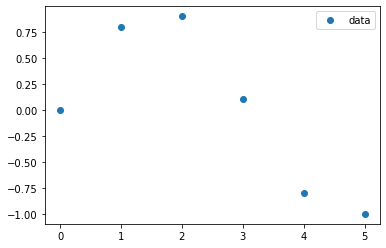

In [22]:
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

f, ax = plt.subplots()
ax.plot(x, y, 'o', label='data');
ax.legend();

Let's fit this data with a cubic polynomial

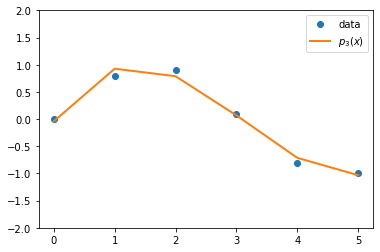

In [23]:
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
ax.plot(x, p(x), '-', lw=2, label='$p_3(x)$')
ax.set_ylim(-2, 2)
ax.legend()
f

And now let' try to fit it with a degree *30* one:

/Users/jbloom/ay250/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


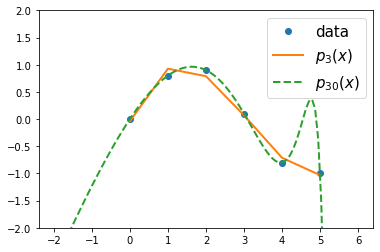

In [24]:
p30 = np.poly1d(np.polyfit(x, y, 30))
xp = np.linspace(-2, 6, 100)
ax.plot(xp, p30(xp), '--', lw=2, label='$p_{30}(x)$')
ax.legend(fontsize=15)
f

## Optimization

A simple Least Squares Fitting example. Note that in practice, you may want to choose `fmin` which provides finer control than `leastsq`.  But for simple cases `leastsq` is sufficient: 

In [25]:
from scipy.optimize import leastsq
from numpy import sin, cos, pi, sqrt

# Define a simple signal model
def model(par):
    p = 1.0 # constant frequency
    return par[0] + par[1]*sin(2*pi*t/p) + par[2]*cos(2*pi*t/p)

# Create some data with this model
par = [0.1, 1.5, 2]
t = np.linspace(0, pi, 300)
y = model(par)

# Add a bit of gaussian noise
dy = 0.5*np.random.rand(y.shape[0])
y += dy

# Define the residual function we minimize, simply the squared error
def resid(par):
    return (model(par)-y)**2

# And call leastsq for the fit (note that it returns a tuple whose first
# element is the parameter fit, what we actually want):
rez = leastsq(resid, [y.mean(), 1, 1] )[0]

print('Exact parameters: ', par)
print('Fitted parameters:', rez)

Exact parameters:  [0.1, 1.5, 2]
Fitted parameters: [0.35169412 1.49986639 2.00678817]


A quick visual verification:

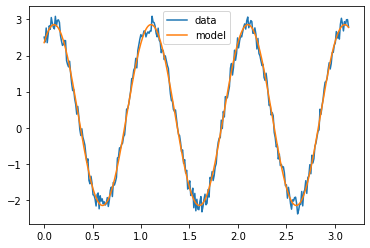

In [26]:
plt.plot(t, y, label='data')
plt.plot(t, model(rez), label='model')
plt.legend();